## Linear Regression with OLS

C:\Users\Dell\AppData\Local\Temp\ipykernel_3652\348497665.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
C:\Users\Dell\AppData\Local\Temp\ipykernel_3652\348497665.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
C:\Users\Dell\AppData\Local\Temp\ipykernel_3652\348497665.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b

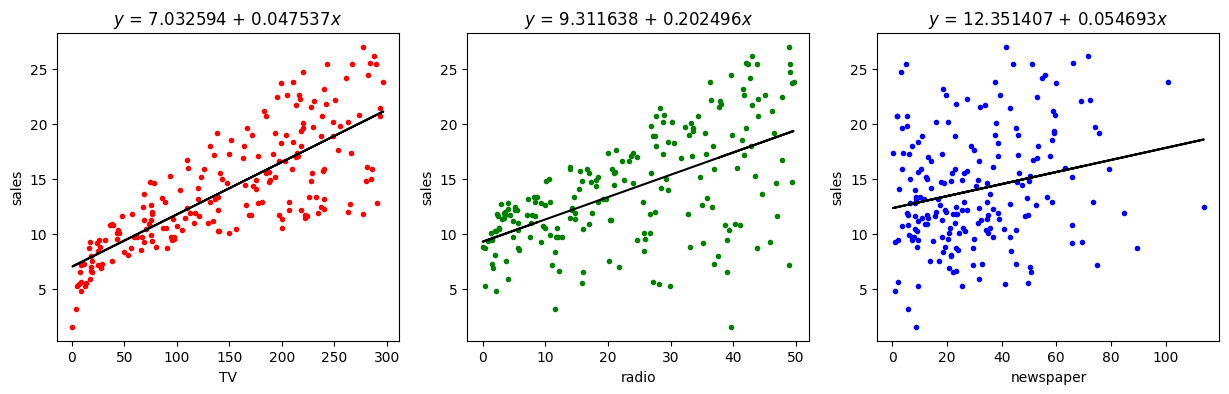

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


data_df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv")

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):

  # initializing our inputs and outputs
  X = data_df[[feature]].values
  Y = data_df[["sales"]].values

  # mean of our inputs and outputs
  x_mean = np.mean(X)
  y_mean = np.mean(Y)

  #total number of samples
  n = len(X)

  # using the OLS formula to calculate the b1 and b0
  numerator = 0
  denominator = 0
  for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

  b1 = numerator / denominator
  b0 = y_mean - (b1 * x_mean)
  y_hat = b0 + np.dot(X,b1)

  ##Plot the regression line
  ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
  ax.plot(X, y_hat, color="black")
  ax.set_xlabel(feature)
  ax.set_ylabel("sales")
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))


# Train model using features data to predict sales
features = ['TV', 'radio', 'newspaper']
colors = ['red', 'green', 'blue']

for i in range(3):
    ax = fig.add_subplot(gs[i])
    train_plot(data_df, features[i], ax, colors[i])

# ax0 = fig.add_subplot(gs[0])
# train_plot(data_df, "TV", ax0, "red")

# # Train model using radio data to predict sales
# ax1 = fig.add_subplot(gs[1])
# train_plot(data_df, "radio", ax1, "green")

# # Train model using newspaper data to predict sales
# ax2 = fig.add_subplot(gs[2])
# train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

## Multiple Linear Regression with OLS

In [9]:
from IPython.display import display, HTML

# Training Linear Regression using TV and Radio features
X = data_df[["TV", "radio"]]
y = data_df[["sales"]]

# set bias/intercept  term to 1 for each 200 samples 
X = np.c_[np.ones((200, 1)), X] 
X_transpose = np.transpose(X)

# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)


message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*betas[0], *betas[1], *betas[2])
display(HTML( message ))

print("")


# # Training Linear Regression using all features
X = data_df[["TV", "radio", "newspaper"]]
y = data_df[["sales"]]

# set bias/intercept  term to 1 for each 200 samples 
X = np.c_[np.ones((200, 1)), X] 
X_transpose = np.transpose(X)


# implementing least square solution of matrix form
betas = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*betas[0], *betas[1], *betas[2], *betas[3])
display(HTML( message ))